## Análise Exploratória de Dados
### Taxa de Suicídio entre 1985 até 2016

#### Descrição do problema

Identificar fatores que contribuem para uma alta taxa de suicídio.

#### Questões (e respostas gráficas) para uma análise individual de cada variável

Recorrência de cada uma das variáveis em relação a taxa de suicídio, levando em consideração o pais, sexo, faixa etária e os demais aspectos.

- Será gerado um histograma de cada uma das variáveis em relação a taxa de suicídio.

#### Questões (e respostas gráficas) para uma análise das relações entre as variáveis

- A partir dos resultados alcançados nas análises individuais, será produzido um gráfico de linha, levando em conta os fatores mais importantes descobertos no experimento anterior.

#### Insights levantados da análise exploratória preliminar realizada na base

Buscar analisar em qual pais a taxa de suicidio é maior, e também analisar quais fatores impactam o resultado, levando em conta questões sociais externas4

---

#### Abertura do arquivo CSV

O arquivo contém os seguintes campos:

- country
- year
- sex
- age
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year
- gdp_for_year ($)
- gdp_per_capita ($)
- generation

In [85]:
import pandas as pd
data = pd.read_csv("suicidio.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Geração das estatísticas de variáveis presentes no dataset
- Groupbys com 3 elementos são dificeis de ser representados em graficos, mas podem ser em gráficos ternários;
- Groupbys com 2 elementos podem ser representados por gráficos de linhas e barras (relação entre as variáveis);
- Groupbys com 1 elemento podem ser representados por gráficos de linhas e barras (análise de uma variável);

In [143]:
import seaborn as sns
from collections import Counter
import plotly.express as px

# sns.distplot(data['age'], hist = True, kde = False, label='Age Histogram')
filteredData = data.copy()
filteredData.drop(columns=['country-year', 'HDI for year'], inplace=True)

# Agrupa por estatísticas interessantes e exporta como um CSV
suicidesByCountryByAgeByYear = filteredData.groupby(['country', 'age', 'year'])['suicides_no'].sum()
suicidesByCountryByAgeByYear.to_csv('suicidesByCountryByAgeByYear.csv')

suicidesByCountryByAge = filteredData.groupby(['country', 'age'])['suicides_no'].sum()
suicidesByCountryByAge.to_csv('suicidesByCountryByAge.csv')

suicidesByCountryByYear = filteredData.groupby(['country', 'year'])['suicides_no'].sum()
suicidesByCountryByYear.to_csv('suicidesByCountryByYear.csv')

suicidesByAge = filteredData.groupby(['age'])['suicides_no'].sum()
suicidesByAge.to_csv('suicidesByAge.csv')

suicidesByAgeByYear = filteredData.groupby(['age', 'year'])['suicides_no'].sum()
suicidesByAgeByYear.to_csv('suicidesByAgeByYear.csv')

suicidesByYear = filteredData.groupby(['year'])['suicides_no'].sum()
suicidesByYear.to_csv('suicidesByYear.csv')

suicidesByCountry = filteredData.groupby(['country'])['suicides_no'].sum().sort_values(ascending=True)
suicidesByCountry.to_csv('suicidesByCountry.csv')

suicidesByAgeBySex = filteredData.groupby(['age', 'sex'])['suicides_no'].sum()
suicidesByAgeBySex.to_csv('suicidesByAgeBySex.csv')

suicidesBySexByAgeByYear = filteredData.groupby(['sex', 'age', 'year'])['suicides_no'].sum()
suicidesBySexByAgeByYear.to_csv('suicidesBySexByAgeByYear.csv')

suicidesByGenerationByYear = filteredData.groupby(['generation', 'year'])['suicides_no'].sum()
suicidesByGenerationByYear.to_csv('suicidesByGenerationByYear.csv')

suicidesByCountryByGenerationByYear = filteredData.groupby(['country', 'generation', 'year'])['suicides_no'].sum()
suicidesByCountryByGenerationByYear.to_csv('suicidesByCountryByGenerationByYear.csv')


In [144]:

# Plot do gráficos
# Número de suicídios por ano por país
suicidesByCountryByYear = suicidesByCountryByYear.reset_index()
fig = px.line(suicidesByCountryByYear, x='year', y="suicides_no", color='country', markers=True, title='Número de suicídios por ano por país', labels= { 'year': 'Ano', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por idade por ano
suicidesByAgeByYear = suicidesByAgeByYear.reset_index()
fig = px.line(suicidesByAgeByYear, x='year', y="suicides_no", color='age', markers=True, title='Número de suicídios por idade por ano', labels= { 'year': 'Ano', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por idade
suicidesByAge = suicidesByAge.reindex(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
suicidesByAge = suicidesByAge.reset_index()
fig = px.bar(suicidesByAge, x='age', y="suicides_no", title='Número de suicídios por idade', labels= { 'age': 'Idade', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por ano
suicidesByYear = suicidesByYear.reset_index()
fig = px.bar(suicidesByYear, x='year', y="suicides_no", title='Número de suicídios por ano', labels= { 'year': 'Ano', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por país em ordem crescente
suicidesByCountry = suicidesByCountry.reset_index()
fig = px.bar(suicidesByCountry, x='country', y="suicides_no", title='Número de suicídios por país em ordem crescente', labels= { 'country': 'País', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por sexo por idade
suicidesByAgeBySex = suicidesByAgeBySex.reindex(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], level='age')
suicidesByAgeBySex = suicidesByAgeBySex.reset_index()
fig = px.bar(suicidesByAgeBySex, x='age', y="suicides_no", color="sex", title='Número de suicídios por sexo por idade', labels= { 'age': 'Idade', 'suicides_no': 'Suicídios'})
fig.show()

# Número de suicídios por geração por ano
suicidesByGenerationByYear = suicidesByGenerationByYear.reset_index()
fig = px.line(suicidesByGenerationByYear, x='year', y="suicides_no", color='generation', markers=True, title='Número de suicídios por geracão por ano', labels= { 'year': 'Ano', 'suicides_no': 'Suicídios'})
fig.show()


## Insights e outros elementos sociais e culturais
### Aumento no número de suicídios no Japão entre 1997 e 1998

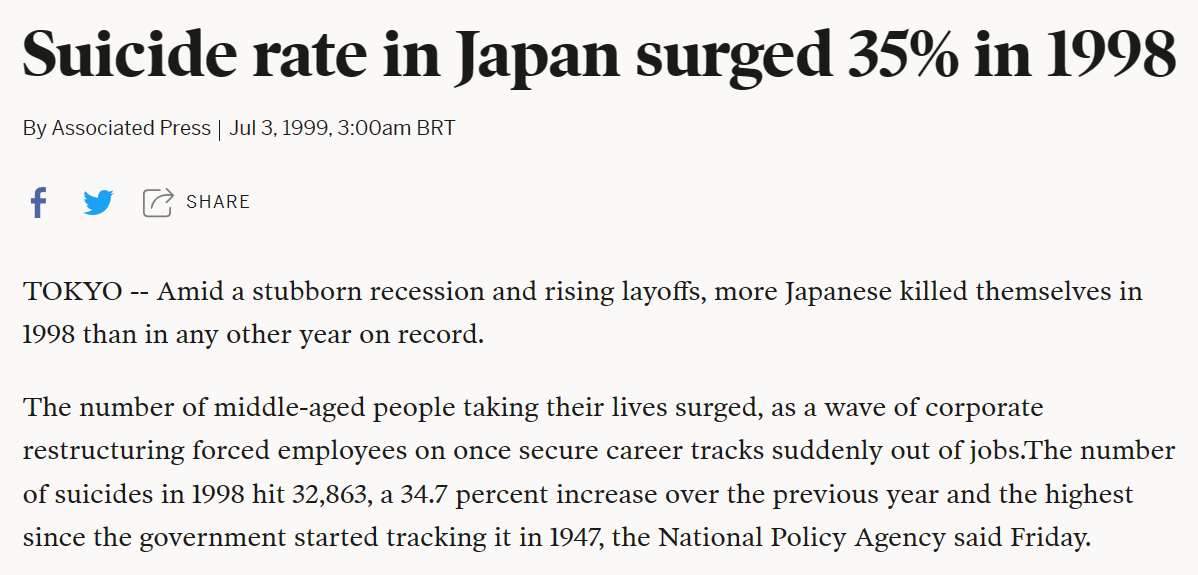